<div style="text-align: center; background-color: skyblue; font-family: 'Times New Roman', serif; color: white; padding: 20px; font-size: 36px; font-weight: bold; border-radius: 15px; box-shadow: 0px 6px 15px rgba(0, 0, 0, 0.2); transition: all 0.3s ease;">
    INTRODUCTION TO DATA SCIENCE<br>
    @ FIT-HCMUS, VNU-HCM<br>
    FINAL PROJECT 🏫
</div>
<style>
    div:hover {
        transform: scale(1.05);
        box-shadow: 0px 10px 20px rgba(0, 0, 0, 0.3);
    }
</style>

<div style="text-align: center; background-color: #ADD8E6; font-family: 'Times New Roman', serif; color: white; padding: 20px; font-size: 30px; font-weight: bold; border-radius: 10px; box-shadow: 0px 6px 15px rgba(0, 0, 0, 0.2); transition: all 0.3s ease;">
    THE ANALYSIS OF THE MOBILE PHONE MARKET AT MOBILE CITY STORE
</div>
<style>
    div:hover {
        transform: scale(1.05);
        box-shadow: 0px 10px 20px rgba(0, 0, 0, 0.3);
    }
</style>


---

<div style="text-align: center; background-color: #ADD8E6; font-family: 'Times New Roman', serif; color: white; padding: 25px; font-size: 20px; font-weight: bold; border-radius: 10px; box-shadow: 0px 6px 15px rgba(0, 0, 0, 0.2); transition: all 0.3s ease;">
    DATA MODELLING
</div>
<style>
    div:hover {
        opacity: 0.8;
    }
</style>

**Người thực hiện**:

| **STT** | **Họ và tên** | **MSSV** |
|-------|---------------|---------|
| 1     | Trương Tiến Anh | 22120017 |
| 2     | Lê Nguyễn Gia Bảo | 22120023 |
| 3     | Đoàn Minh Cường | 22120043 |


---

## **Vấn đề được áp dụng Học máy:** 
## Dự đoán giá điện thoại dựa trên các đặc trưng quan trọng và cần thiết.

---

## Thư viện:

In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import SGDRegressor
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

import ast
import time
import csv

## Đọc dữ liệu từ file CSV:

In [55]:
df = pd.read_csv("../data/processed_data.csv", index_col=0)

In [56]:
df.sample(3)

,ten,loai_dien_thoai,thoi_gian_bao_hanh,danh_gia,so_luong_binh_luan,duong_dan,mau_sac,gia_moi,gia_cu,he_dieu_hanh,...,la_dien_thoai_cu,kich_thuoc_man_hinh,tan_so_quet,do_sang_man_hinh,loai_man_hinh,so_the_sim,loai_pin,cong_suat_sac,do_phan_giai_cam_sau,do_phan_giai_cam_truoc
2999,Điện thoại Vivo X100 5G (Dimensity 9300),Vivo,12.0,5.0,11,https://mobilecity.vn/dien-thoai/vivo-x100-5g-...,Đen,15550000.0,NaN,Android 14,...,False,6.78,120.0,3000.0,AMOLED,2,Li-Po,120.0,"[50.0, 64.0, 50.0]",[32.0]
4041,Điện thoại OnePlus 8T Cũ,Điện thoại Cũ,1.0,5.0,14,https://mobilecity.vn/kho-may-cu/oneplus-8t-cu...,Xanh,NaN,NaN,Android 11,...,True,6.55,120.0,NaN,AMOLED,2,Li-Po,65.0,"[48.0, 16.0, 5.0, 2.0]",[16.0]
1545,Điện thoại Xiaomi Redmi Note 13R 5G (Snapdrago...,Redmi,12.0,5.0,0,https://mobilecity.vn/dien-thoai/xiaomi-redmi-...,Đen,4950000.0,NaN,Android 14,...,False,6.79,120.0,550.0,LCD,2,NaN,33.0,"[50.0, 2.0]",[8.0]


## Tiền xử lý dữ liệu cho các mô hình:

### Loại bỏ các cột không ảnh hưởng đến giá dựa vào kiến thức:

#### Loại bỏ cột `ten`, `duong_dan`, `loai_dien_thoai`, `mau_sac`, `thiet_ke`, `cpu`:

- `ten` là tên của các mẫu điện thoại.

In [57]:
df = df.drop(columns=['ten'])

- `duong_dan` là liên kết đến trang thông tin của điện thoại trên website.

In [58]:
df = df.drop(columns=['duong_dan'])

- `loai_dien_thoai` lưu thông tin cụ thể hơn cho `hang_dien_thoai`, không ảnh hưởng đến giá.

In [59]:
df = df.drop(columns=['loai_dien_thoai'])

- `mau_sac` lưu các màu sắc khác nhau của từng mẫu điện thoại, không ảnh hưởng đến giá.

In [60]:
df = df.drop(columns=['mau_sac'])

- `thiet_ke` mô tả cấu tạo của một chiếc điện thoại, không ảnh hưởng đến giá.

In [61]:
df = df.drop(columns=['thiet_ke'])

- `cpu` trong bộ dữ liệu này cũng là một cột không ảnh hưởng đến giá.

In [62]:
df = df.drop(columns=['cpu'])

#### Loại bỏ các dòng trùng lặp:

In [63]:
print(f"Số dòng trùng lặp hiện tại là: {df.duplicated().sum()}")

Số dòng trùng lặp hiện tại là: 5415


In [64]:
# Loại bỏ dòng trùng lặp
df = df.drop_duplicates()

In [65]:
print(f"Số dòng trùng lặp hiện tại là: {df.duplicated().sum()}")

Số dòng trùng lặp hiện tại là: 0


### Loại bỏ các cột dựa vào phân tích:

#### Xem tỷ lệ dữ liệu thiếu ở của các thuộc tính hiện tại:

In [66]:
def missing_ratio(col):
    return (col.isna().mean() * 100).round(1)

In [67]:
missing_ratio_df = df.apply(missing_ratio).sort_values(ascending=False)
missing_ratio_df = missing_ratio_df.reset_index()
missing_ratio_df.columns = ["Features", "Missing ratio"]
missing_ratio_df

,Features,Missing ratio
0,do_sang_man_hinh,43.7
1,gia_cu,43.0
2,loai_pin,27.4
3,tan_so_quet,25.1
4,gia_moi,19.7
5,cong_suat_sac,7.5
6,bo_nho_trong,7.1
7,kich_thuoc_man_hinh,5.8
8,loai_man_hinh,5.5
9,dung_luong_pin,2.4


- Nhận thấy rằng cột `do_sang_man_hinh` và `gia_cu` có tỉ lệ các giá trị thiếu rất cao so với phần còn lại. Ta sẽ loại bỏ 2 cột này:

In [68]:
df = df.drop(columns=["gia_cu", "do_sang_man_hinh"])

#### Loại bỏ các hàng tồn tại ít nhất một giá trị NaN.

- Mục đích: để giữ tính thực tế của dữ liệu, chúng em không điền giữ liệu thiếu mà sẽ xóa đi.

In [69]:
df = df.dropna()

#### Xem thông tin của dữ liệu hiện tại:

In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1549 entries, 18 to 8339
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   thoi_gian_bao_hanh      1549 non-null   float64
 1   danh_gia                1549 non-null   float64
 2   so_luong_binh_luan      1549 non-null   int64  
 3   gia_moi                 1549 non-null   float64
 4   he_dieu_hanh            1549 non-null   object 
 5   ram                     1549 non-null   float64
 6   bo_nho_trong            1549 non-null   float64
 7   dung_luong_pin          1549 non-null   float64
 8   hang_dien_thoai         1549 non-null   object 
 9   la_dien_thoai_cu        1549 non-null   bool   
 10  kich_thuoc_man_hinh     1549 non-null   float64
 11  tan_so_quet             1549 non-null   float64
 12  loai_man_hinh           1549 non-null   object 
 13  so_the_sim              1549 non-null   int64  
 14  loai_pin                1549 non-null  

#### Xử lý các cột non-numeric:

##### Trước hết ta cần chuyển các thuộc tính có kiểu category về kiểu số:

In [71]:
df.select_dtypes(include=['object']).info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1549 entries, 18 to 8339
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   he_dieu_hanh            1549 non-null   object
 1   hang_dien_thoai         1549 non-null   object
 2   loai_man_hinh           1549 non-null   object
 3   loai_pin                1549 non-null   object
 4   do_phan_giai_cam_sau    1549 non-null   object
 5   do_phan_giai_cam_truoc  1549 non-null   object
dtypes: object(6)
memory usage: 84.7+ KB


- Tách cột `he_dieu_hanh` thành 2 cột `Android` và `iOS`:

In [72]:
df['he_dieu_hanh'].unique()

array(['Android 13', 'Android 12', 'Android 11', 'Android 14',
       'Android 10', 'iOS 16', 'iOS 15', 'Android 15', 'iOS 17', 'Khác',
       'iOS 18', 'Android 9'], dtype=object)

In [73]:
def extract_os_version(os, os_type):
    if os.startswith(os_type):
        return int(os.split(" ")[1])  # Lấy phiên bản (phần số)
    return 0  # Nếu không phải hệ điều hành đó, trả về 0

In [74]:
# Thêm 2 cột mới thay cho cột he_dieu_hanh
df['Android'] = df['he_dieu_hanh'].apply(lambda x: extract_os_version(x, 'Android'))
df['iOS'] = df['he_dieu_hanh'].apply(lambda x: extract_os_version(x, 'iOS'))

In [75]:
# Xóa cột he_dieu_hanh
df = df.drop(columns=['he_dieu_hanh'])

- Cột `do_phan_giai_cam_sau` và `do_phan_giai_cam_truoc`:

In [76]:
df['do_phan_giai_cam_sau'].sample(5)

7747    [200.0, 50.0, 10.0, 12.0]
3132           [50.0, 50.0, 50.0]
4560       [108.0, 8.0, 2.0, 2.0]
5883                  [50.0, 2.0]
1097             [48.0, 8.0, 2.0]
Name: do_phan_giai_cam_sau, dtype: object

In [77]:
df['do_phan_giai_cam_truoc'].sample(5)

488     [32.0]
1259    [32.0]
4775    [32.0]
2650    [16.0]
2403    [32.0]
Name: do_phan_giai_cam_truoc, dtype: object

- Nhận xét:
    - 2 cột trên lưu trữ danh sách thông số của từng camera ở trước và sau của mỗi điện thoại.
    - Ta sẽ chuyển 2 cột này về dạng số bằng cách cộng tổng các số trong mỗi danh sách.

In [78]:
df['do_phan_giai_cam_sau'] = df['do_phan_giai_cam_sau'].apply(ast.literal_eval)
df['do_phan_giai_cam_sau'] = df['do_phan_giai_cam_sau'].apply(sum)

In [79]:
df['do_phan_giai_cam_truoc'] = df['do_phan_giai_cam_truoc'].apply(ast.literal_eval)
df['do_phan_giai_cam_truoc'] = df['do_phan_giai_cam_truoc'].apply(sum)

- Cột `hang_dien_thoai`, `loai_man_hinh`, `loai_pin`:

In [80]:
df['hang_dien_thoai'].unique()

array(['Xiaomi', 'Realme', 'Samsung', 'iPhone', 'Vivo', 'Tecno', 'itel',
       'Motorola', 'Google', 'Honor', 'Oppo', 'Infinix', 'OnePlus',
       'Bphone', 'BLU', 'Ulefone', 'Meizu', 'Lenovo', 'ZTE', 'Asus',
       'Nubia', 'Nothing', 'Sony', 'Unihertz', 'Fairphone', 'NIO', 'Red',
       'POCO'], dtype=object)

In [81]:
df['loai_man_hinh'].unique()

array(['LCD', 'OLED', 'AMOLED'], dtype=object)

In [82]:
df['loai_pin'].unique()

array(['Li-Po', 'Li-Ion', 'Si/C'], dtype=object)

- Nhận xét:
    - Các cột này gồm các giá trị không có mối quan hệ thứ tự.
    - Do đó dùng OneHotEncoder để chuyển đổi.

In [83]:
cat_features_onehot = ['hang_dien_thoai', 'loai_man_hinh', 'loai_pin']

In [84]:
# Khởi tạo OneHotEncoder
onehot_encoder = OneHotEncoder(sparse=False, drop='first')  # drop='first' để loại bỏ cột tham chiếu

# Áp dụng OneHotEncoder lên các cột phân loại
encoded_data = onehot_encoder.fit_transform(df[cat_features_onehot])

# Chuyển đổi kết quả thành DataFrame và gắn tên cột mới
encoded_df = pd.DataFrame(encoded_data, columns=onehot_encoder.get_feature_names_out(cat_features_onehot))

In [85]:
df = df.reset_index(drop=True)

# Nối các cột One-Hot đã mã hóa vào DataFrame gốc
df = pd.concat([df, encoded_df], axis=1)

# Xoá các cột phân loại ban đầu
df = df.drop(columns=cat_features_onehot)

- Cột `la_dien_thoai_cu`:

In [86]:
df['la_dien_thoai_cu'].unique()

array([False,  True])

- Nhận xét:
    - Chuyển cột này bằng LabelEncoder.

In [87]:
print("Kích thước trước fillna:", df.shape)
df['la_dien_thoai_cu'] = df['la_dien_thoai_cu'].fillna(-1)
print("Kích thước sau fillna:", df.shape)

Kích thước trước fillna: (1549, 47)
Kích thước sau fillna: (1549, 47)


In [88]:
# Thay NaN bằng -1
df['la_dien_thoai_cu'] = df['la_dien_thoai_cu'].fillna(-1)

# Khởi tạo LabelEncoder
label_encoder = LabelEncoder()

# Áp dụng LabelEncoder
df['la_dien_thoai_cu'] = label_encoder.fit_transform(df['la_dien_thoai_cu'])

In [89]:
df['la_dien_thoai_cu'].unique()

array([0, 1], dtype=int64)

##### Xem lại thông tin của bộ dữ liệu:

In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1549 entries, 0 to 1548
Data columns (total 47 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   thoi_gian_bao_hanh         1549 non-null   float64
 1   danh_gia                   1549 non-null   float64
 2   so_luong_binh_luan         1549 non-null   int64  
 3   gia_moi                    1549 non-null   float64
 4   ram                        1549 non-null   float64
 5   bo_nho_trong               1549 non-null   float64
 6   dung_luong_pin             1549 non-null   float64
 7   la_dien_thoai_cu           1549 non-null   int64  
 8   kich_thuoc_man_hinh        1549 non-null   float64
 9   tan_so_quet                1549 non-null   float64
 10  so_the_sim                 1549 non-null   int64  
 11  cong_suat_sac              1549 non-null   float64
 12  do_phan_giai_cam_sau       1549 non-null   float64
 13  do_phan_giai_cam_truoc     1549 non-null   float

##### Chúng ta đã chuyển đổi các cột non-numeric về numeric, vậy nên ta sẽ áp dụng tất cả thuộc tính này vào các mô hình.

### Chuẩn hóa cho các cột dữ liệu số ban đầu:

In [91]:
num_features = ['thoi_gian_bao_hanh', 'danh_gia', 'so_luong_binh_luan', 'ram', 'bo_nho_trong', 'dung_luong_pin', 'kich_thuoc_man_hinh', 'tan_so_quet', 'so_the_sim', 'cong_suat_sac']

In [92]:
# Khởi tạo StandardScaler
num_transformer = StandardScaler()

# Áp dụng StandardScaler lên các cột số ban đầu
df[num_features] = num_transformer.fit_transform(df[num_features])

## Tạo các mô hình:

### Tạo DataFrame X và y:

In [93]:
X = df.drop(columns=["gia_moi"])
y = df["gia_moi"]

### Chia dữ liệu thành tập huấn luyện và tập kiểm tra:

In [94]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/3, random_state=42)

### Model: `Stochastic Gradient Descent (SGD)` - Linear Regression

#### Lý do chọn:

- `Linear Regression` được lựa chọn vì tính đơn giản, hiệu quả và phù hợp với các tập dữ liệu cỡ trung bình như bộ dữ liệu của đồ án này (gần 8700 mẫu).

- `Stochastic Gradient Descent`:
    - Là một phương pháp tối ưu hóa trong Machine Learning. 
    - Nó là một biến thể của **Gradient Descent**, **SGD** thực hiện cập nhật trọng số trên từng mẫu dữ liệu một cách ngẫu nhiên, giúp tăng tốc độ hội tụ và tránh bẫy cục bộ.

### Tạo pipeline với mô hình:

In [95]:
model_SGD = Pipeline(steps=[('regressor', SGDRegressor())])

### Tạo grid các tham số để tìm kiếm tối ưu cho mô hình:

In [96]:
parameters_grid = {
    'regressor__alpha': [0.001, 0.01, 0.1, 1],
    'regressor__learning_rate': ['constant', 'optimal', 'adaptive'],
    'regressor__max_iter': [500, 1000, 1500]
}

### Tìm kiếm tham số tối ưu cho mô hình:

In [97]:
grid_search = GridSearchCV(model_SGD, parameters_grid, cv=5, scoring='neg_mean_squared_error')

### Huấn luyện mô hình với GridSearchCV trên tập dữ liệu huấn luyện:

In [98]:
import warnings
warnings.filterwarnings('ignore') # Bỏ qua các cảnh báo

grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=Pipeline(steps=[('regressor', SGDRegressor())]),
             param_grid={'regressor__alpha': [0.001, 0.01, 0.1, 1],
                         'regressor__learning_rate': ['constant', 'optimal',
                                                      'adaptive'],
                         'regressor__max_iter': [500, 1000, 1500]},
             scoring='neg_mean_squared_error')

### Tham số tốt nhất tìm được:

In [99]:
grid_search.best_params_

{'regressor__alpha': 0.1,
 'regressor__learning_rate': 'adaptive',
 'regressor__max_iter': 500}

### Huấn luyện mô hình với tham số tốt nhất & tính thời gian:

In [100]:
best_params = {'alpha': 0.1,
                'learning_rate': 'adaptive',
                'max_iter': 500}

In [101]:
best_model_SGD = Pipeline(steps=[('regressor', SGDRegressor(**best_params))])

In [102]:
time_start = time.time()
best_model_SGD.fit(X_train, y_train)
time_end = time.time()

In [103]:
training_time_SGD = time_end - time_start
print(f"Training time: {training_time_SGD:.2f} seconds")

Training time: 0.02 seconds


### Đánh giá mô hình:

#### Dự đoán giá trị đầu ra trên tập dữ liệu kiểm tra bằng mô hình tốt nhất:

In [104]:
y_pred_SGD = best_model_SGD.predict(X_test)

#### Tính toán các chỉ số đánh giá mô hình:

In [105]:
mae_SGD = mean_absolute_error(y_test, y_pred_SGD)
mse_SGD = mean_squared_error(y_test, y_pred_SGD)
r2_SGD = r2_score(y_test, y_pred_SGD)

In [106]:
print(f"Mean Absolute Error: {mae_SGD:.2f}")
print(f"Mean Squared Error: {mse_SGD:.2f}")
print(f"R^2: {r2_SGD:.2f}")

Mean Absolute Error: 2918727487.59
Mean Squared Error: 13348871715463163904.00
R^2: -307806.01


#### Trực quan hóa:

##### Vẽ biểu đồ so sánh giá trị thực tế và giá trị dự đoán:

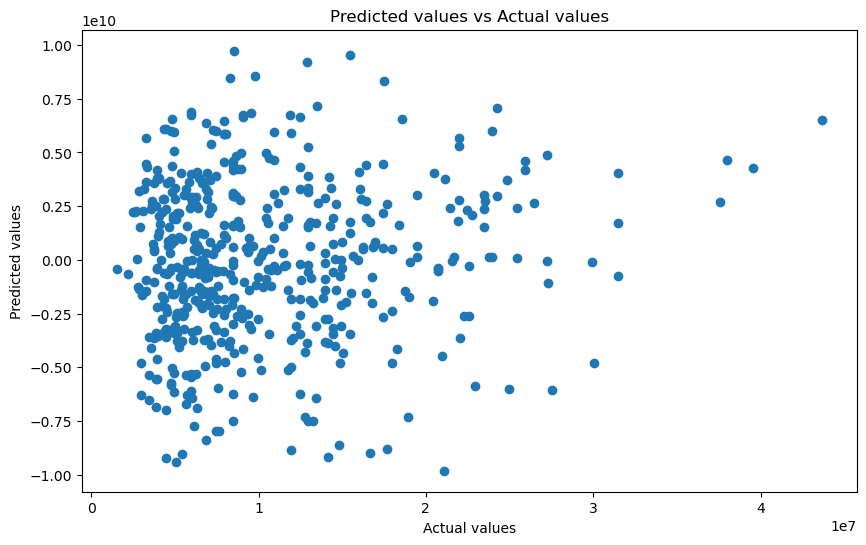

In [107]:
plt.figure(figsize=(10, 6))

plt.scatter(y_test, y_pred_SGD)
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.title('Predicted values vs Actual values')

plt.show()